In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mat_data = scipy.io.loadmat(r'C:\Users\kriti\OneDrive\Desktop\dsp final proj\UCI Dataset.zip\Database 1\male_1.mat')
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'cyl_ch1', 'cyl_ch2', 'hook_ch1', 'hook_ch2', 'tip_ch1', 'tip_ch2', 'palm_ch1', 'palm_ch2', 'spher_ch1', 'spher_ch2', 'lat_ch1', 'lat_ch2'])


In [2]:
print(mat_data['cyl_ch1'].shape)
print(mat_data['hook_ch1'].shape)


(30, 3000)
(30, 3000)


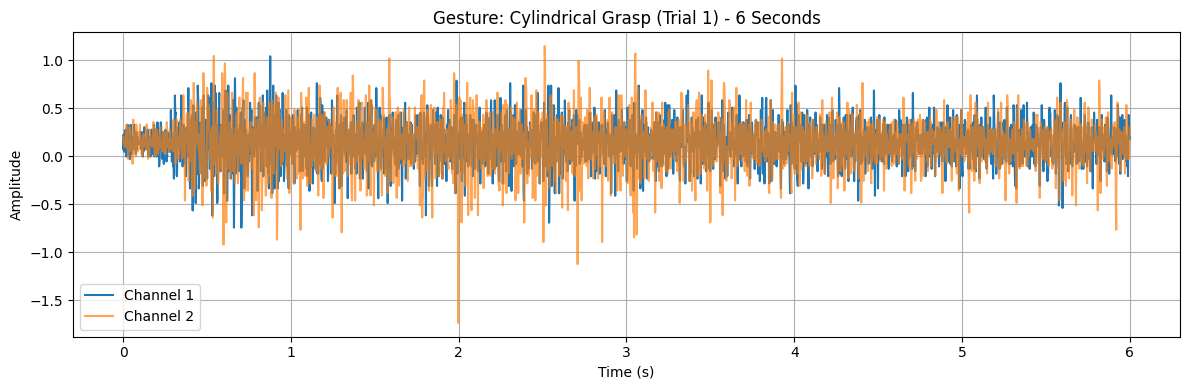

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

signal_ch1 = mat_data['cyl_ch1'][0] 
signal_ch2 = mat_data['cyl_ch2'][0]

time = np.linspace(0, 6, 3000) 

plt.figure(figsize=(12, 4))
plt.plot(time, signal_ch1, label='Channel 1')
plt.plot(time, signal_ch2, label='Channel 2', alpha=0.7)
plt.title('Gesture: Cylindrical Grasp (Trial 1) - 6 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


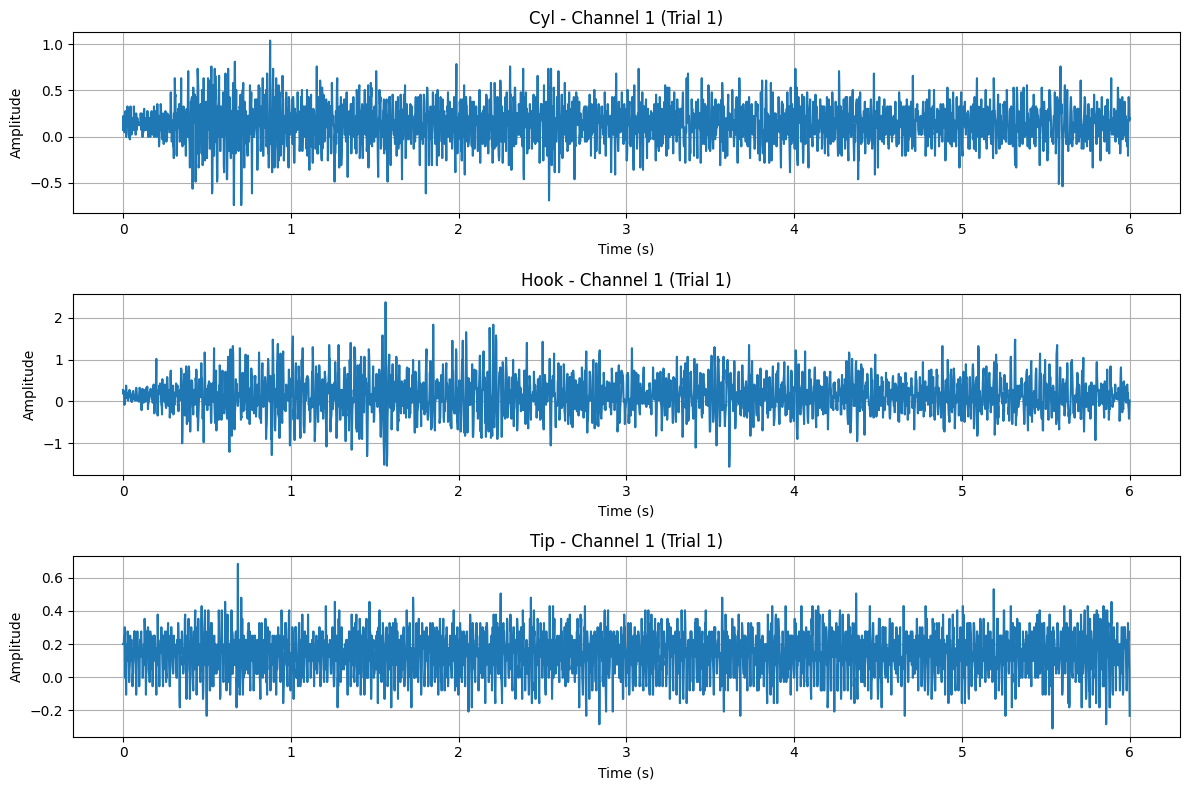

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

gestures = ['cyl', 'hook', 'tip']
time = np.linspace(0, 6, 3000)  
plt.figure(figsize=(12, 8))

for i, gesture in enumerate(gestures):
    signal = mat_data[f'{gesture}_ch1'][0] 
    plt.subplot(3, 1, i + 1)
    plt.plot(time, signal, color='tab:blue')
    plt.title(f'{gesture.capitalize()} - Channel 1 (Trial 1)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


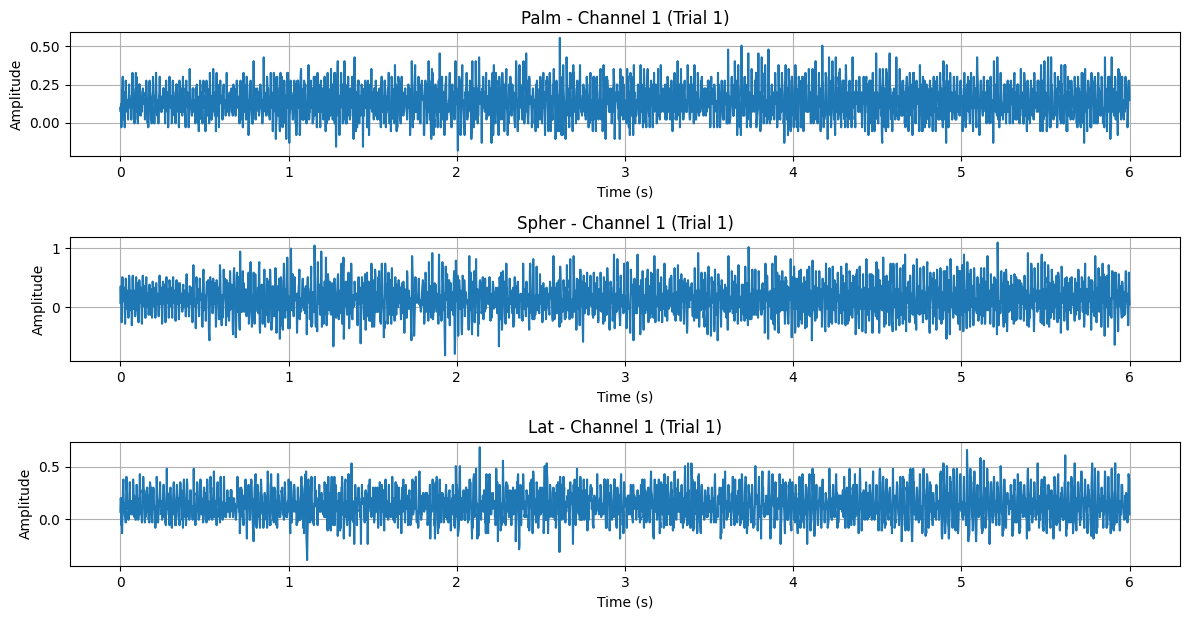

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

gestures = ['palm', 'spher', 'lat']
time = np.linspace(0, 6, 3000) 

plt.figure(figsize=(12, 12))

for i, gesture in enumerate(gestures):
    signal = mat_data[f'{gesture}_ch1'][0] 
    plt.subplot(6, 1, i + 1)
    plt.plot(time, signal, color='tab:blue')
    plt.title(f'{gesture.capitalize()} - Channel 1 (Trial 1)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

gestures = ['cyl', 'hook', 'tip', 'palm', 'spher', 'lat']

stats = []

for gesture in gestures:
    data = mat_data[f'{gesture}_ch1'] 
    flattened = data.flatten()
    
    mean_val = np.mean(flattened)
    std_val = np.std(flattened)
    min_val = np.min(flattened)
    max_val = np.max(flattened)
    
    stats.append({
        'Gesture': gesture,
        'Mean': mean_val,
        'Std Dev': std_val,
        'Min': min_val,
        'Max': max_val
    })

stats_df = pd.DataFrame(stats)
print(stats_df)


  Gesture      Mean   Std Dev       Min       Max
0     cyl  0.140797  0.220489 -1.432398  1.398283
1    hook  0.141017  0.496802 -4.620102  6.320098
2     tip  0.141128  0.123200 -0.437835  0.735241
3    palm  0.140572  0.099201 -0.310326  0.582231
4   spher  0.139193  0.242669 -1.916929  2.188834
5     lat  0.140973  0.142826 -1.559906  1.780808


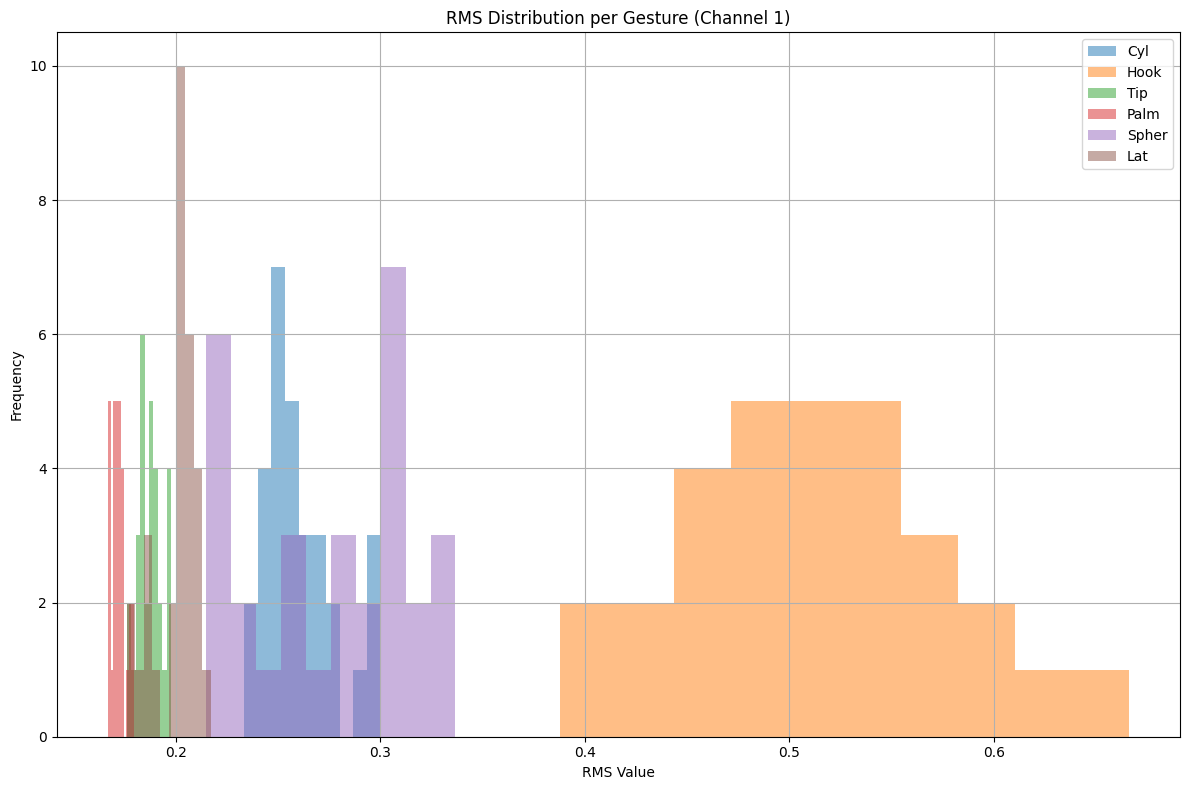

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gestures = ['cyl', 'hook', 'tip', 'palm', 'spher', 'lat']
rms_values = {}

for gesture in gestures:
    data = mat_data[f'{gesture}_ch1'] 
    rms_per_trial = np.sqrt(np.mean(data**2, axis=1))  
    rms_values[gesture] = rms_per_trial


plt.figure(figsize=(12, 8))

for gesture in gestures:
    plt.hist(rms_values[gesture], bins=10, alpha=0.5, label=gesture.capitalize())

plt.title('RMS Distribution per Gesture (Channel 1)')
plt.xlabel('RMS Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
